In [1]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import numpy as np
#导入鸢尾花数据集
iris = load_iris()

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
X=iris['data'][:,3:]
y = (iris['target']==2).astype(np.int32)


In [5]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [6]:
X_pre = np.linspace(0, 3, 1000).reshape(-1, 1)
#预测概率值，普通的predict直接预测类别
y_pre=log_reg.predict_proba(X_pre)#得到一个1的概率和0的概率的矩阵


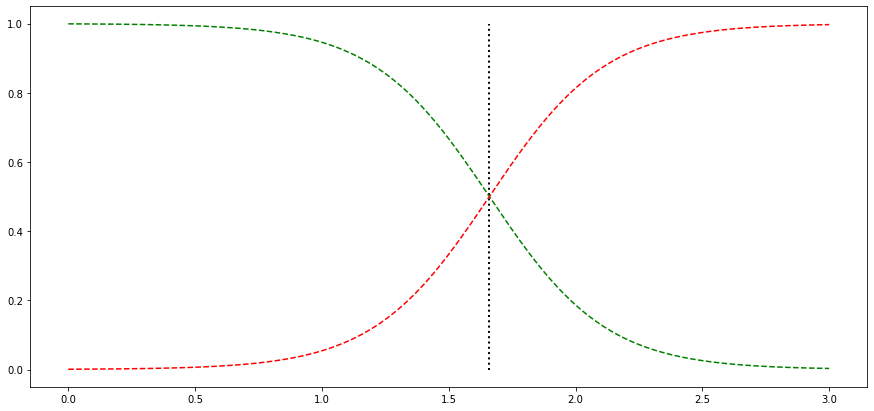

In [7]:
plt.figure(figsize=(15,7))
decision_by = X_pre[y_pre[:,1]>0.5][0]
plt.plot([decision_by,decision_by],[0,1],'k:',linewidth=2)
plt.plot(X_pre,y_pre[:,0],'g--',label='vir')
plt.plot(X_pre,y_pre[:,1],'r--',label='vir')
plt.show()
#画箭头plt.arrow

In [8]:
#绘制决策边界
X = iris['data'][:,(2,3)]
y= (iris['target']==2).astype(np.int32)

In [9]:
X[:,0].min(),X[:,1].max()

(1.0, 2.5)

In [10]:
log_res = LogisticRegression(C=1000)
log_res.fit(X,y)

LogisticRegression(C=1000)

In [11]:
#构建坐标
x0,x1 = np.meshgrid(np.linspace(2.9,7,500).reshape(-1,1),np.linspace(0.8,2.7,200).reshape(-1,1))
X_new = np.c_[x0.ravel(),x1.ravel()]

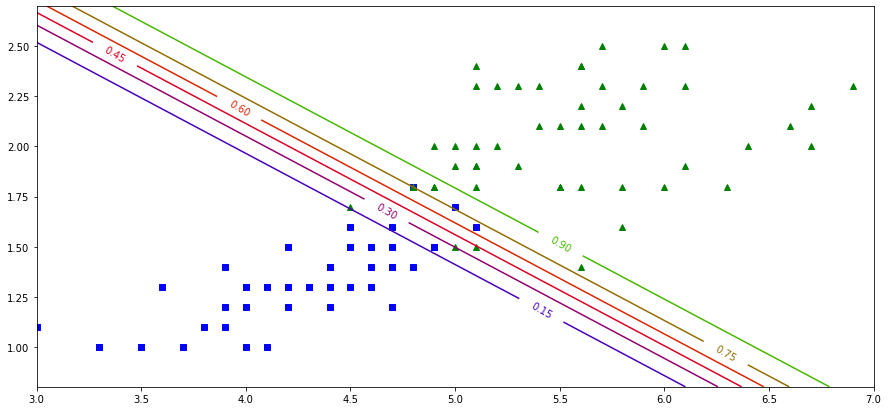

In [12]:
y_pre = log_res.predict_proba(X_new)
plt.figure(figsize=(15,7))
plt.plot(X[y==0,0],X[y==0,1],'bs')
plt.plot(X[y==1,0],X[y==1,1],'g^')
zz = y_pre[:,1].reshape(x0.shape)
contour = plt.contour(x0,x1,zz,cmap = plt.cm.brg)
plt.clabel(contour)
plt.axis([3,7,0.8,2.7])
#plt.text(X,Y,'text',fontsize=,color=)
plt.show()

In [13]:
X= iris['data'][:,(2,3)]
y= iris['target']

In [18]:
softmax_lreg = LogisticRegression(multi_class='multinomial',solver='lbfgs')
softmax_lreg.fit(X,y)
softmax_lreg.predict_proba([[5,2]])

LogisticRegression(multi_class='multinomial')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


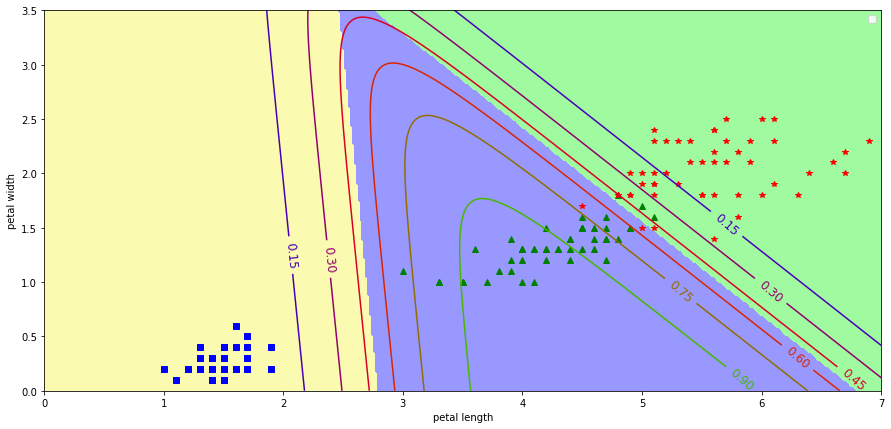

In [44]:
x0,x1 = np.meshgrid(
    np.linspace(0,8,500).reshape(-1,1),
    np.linspace(0,3.6,200).reshape(-1,1)
)
X_new = np.c_[x0.ravel(),x1.ravel()]
y_proba = softmax_lreg.predict_proba(X_new)
y_pre = softmax_lreg.predict(X_new)

#修改不同的评分，可以看到不同的等高线
zz1 = y_proba[:,1].reshape(x0.shape)
zz = y_pre.reshape(x0.shape)
plt.figure(figsize=(15,7))
from matplotlib.colors import ListedColormap
plt.plot(X[y==0,0],X[y==0,1],'bs')
plt.plot(X[y==1,0],X[y==1,1],'g^')
plt.plot(X[y==2,0],X[y==2,1],'r*')

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
#contour绘制等高线，contourf会填充等高线
plt.contourf(x0,x1,zz,cmap=custom_cmap)
contour = plt.contour(x0,x1,zz1,cmap=plt.cm.brg)
plt.clabel(contour,inline = 1 , fontsize = 12)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.axis([0,7,0,3.5])
plt.show()


In [33]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])